=== Debug check approx pi at (k=1), (k=2), (k=3) ============

w,  reference         : [2.6666666666666665, 2.844444444444444, 2.9257142857142853]
w,  vectorized        : [2.6666666666666665, 2.844444444444444, 2.9257142857142853]
w,  recursive         : [2.6666666666666665, 2.844444444444444, 2.9257142857142853]
w,  recursive memoized: [2.6666666666666665, 2.844444444444444, 2.9257142857142853]

gl, reference         : [4, 2.666666666666667, 3.466666666666667]
gl, vectorized        : [4.0, 2.666666666666667, 3.466666666666667]
gl, recursive         : [4, 2.666666666666667, 3.466666666666667]
gl, recursive memoized: [4, 2.666666666666667, 3.466666666666667]

eb, reference         : [2.449489742783178, 2.7386127875258306, 2.8577380332470415]
eb, vectorized        : [2.449489742783178, 2.7386127875258306, 2.8577380332470415]
eb, recursive         : [2.449489742783178, 2.7386127875258306, 2.8577380332470415]
eb, recursive memoized: [2.449489742783178, 2.7386127875258306, 2.857738033247041

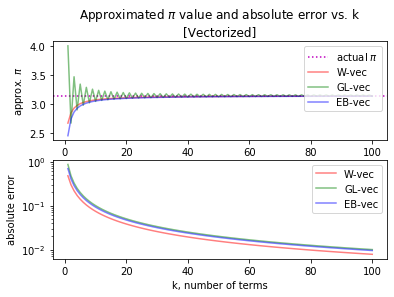

<Figure size 432x288 with 0 Axes>

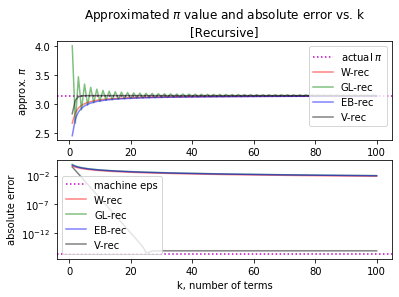

<Figure size 432x288 with 0 Axes>

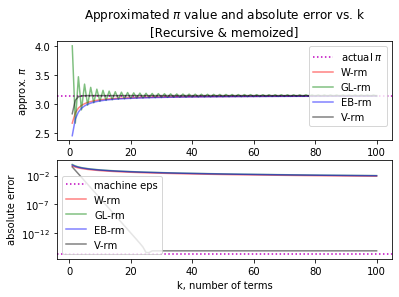

<Figure size 432x288 with 0 Axes>

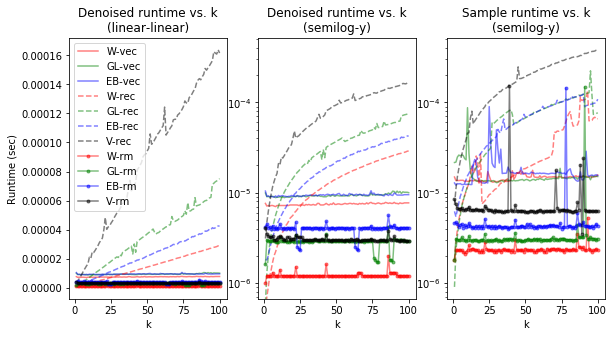

<Figure size 432x288 with 0 Axes>

In [2]:
# ECE 105: Programming for Engineers II (Spring, 2020)
# HW 5 : Approximation of pi
# - Student name:   Hasham Tanveer  <------------ FIX THIS
# - Email ID:         ht369              <------------ FIX THIS

import numpy as np
import matplotlib.pyplot as plt

import time  # library for measuring runtime


"""
See the HW instruction PDF for full details.

The goal of this HW is to study the speed performance (i.e. runtime) between 
the following three different algorithm styles:
 1) Vectorized
 2) Recursive (without memoization)
 3) Recursive with memoization
In other words, do the same task, in three different ways. Find which way is 
faster.

Suppose the task at hand is to evaluate accuracy of the approximated value of 
pi using four different infinite series or product equations:
 1) Wallis' equation (w)
 2) The Gregory-Leibniz equation (gl)
 3) Euler's Basel equation (eb)
 4) Viete's equation (v)
All four equations above converge to the actual value of pi if infinite number 
of terms are used. However, infinite number of terms is infeasible. 
Nonetheless, the accuracy of the approximated value improves as more terms are 
used in the equation. The goal is to plot approximated pi value as a function 
of k, where k is the number of terms used. Repeat this for each of the four 
equations.

In summary, the purpose of this script is to generate the following figures.

Fig.1: Vectorized style (abbreviated as "vec")
 Compare results between w vs. gl vs. eb (Viete's cannot be vectorized)
 subplot(211) plot of approximated pi value vs. k
 subplot(212) plot of absolute error between the approximation and the actual 
              pi value vs. k
 
Fig.2: Recursive style (abbreviated as "rec")
 Compare results between w vs. gl vs. eb vs. v
 subplot(211) and (212) same as those of Fig. 1
 
Fig.3: Recursive with memoization style (abbreviated as "rm")
 Compare results between w vs. gl vs. eb vs. v
 subplot(211) and (212) same as those of Fig. 1       

Fig.1-3 should give similar looking plots. The results should match.

Fig.4: Compare runtime between all methods (all combinations of pi equation and 
algorith style, i.e.    w-vec, gl-vec, eb-vec
                        w-rec, gl-rec, eb-rec, v-rec
                        w-rm , gl-rm , eb-rm , v-rm )


Your tasks are to complete the missing function definitions in Section 1-3,
and to briefly read through code in Section 4-7.
 * w-vec, w-rec, w-rm methods are already completed to serve as an example.
 * The code for sections 4-7 debug checking and plotting results are completed.
   Just skim through to study how it works.
 * Run Section 4 to debug/check your code in Section 1-3
 * Run Section 5-7 to generate figures
"""
    
#%% Section 1: Vectorization via numpy
"""
Wallis' infinite product for pi
pi/2 = ((2 * 2) / (1 * 3)) * ((4 * 4) / (3 * 5)) * ((6 * 6) / (5 * 7))...
     =         4/3         *        16/15        *        36/35 ... 
     = infinite product of (2n*2n)/(2n-1)/(2n+1), where n = 1 to infinite
     = infinite product of (4n^2)/(4n^2-1)
pi_w_vectorized(k) uses vectorizated code style and returns 
     the approximated value of pi using the first k terms in this product
"""
def pi_w_vectorized(k):  # <---------------- EXAMPLE :D
    # # - - - Alternative approach - - -
    # two_n_vec = np.arange(2, 2*k+1, 2)  # vector of [2,4,6,..., 2k]
    #
    # # vector of first k terms of (2n*2n)/(2n-1)/(2n+1)
    # k_terms_vec = (two_n_vec**2) / (two_n_vec-1) / (two_n_vec+1)
    
    # Note the use of numpy arrays here. Vectors here are not list data type.
    n_vec = np.arange(1,k+1)  # vector of [1,2,3,..., k]
    four_n_n_vec = 4*n_vec*n_vec
    
    # vector of first k terms of (4n^2)/(4n^2-1)
    k_terms_vec = four_n_n_vec/(four_n_n_vec-1) # [4/3, 16/15,...,4kk/(4kk-1)]
    
    
    # approximated pi = 2*product( first k terms vector)
    pi_val = 2 * np.prod(k_terms_vec)
    # Hint: Use np.prod( ) to multiply each element in a numpy array
    # Note: pi_val will be a single value and of type "numpy.float64"
    
    # Use the print function to help debug, such as follows
    # print('debug check 4nn vector:', four_n_n_vec)
    # print('debug check each term in the product:', k_terms_vec)
    return pi_val

#%%
"""
Gregory-Leibniz's equation
pi/4 = 1 - 1/3 + 1/5 - 1/7 + 1/9 - ...
     = infinite series of (-1)^(n+1) * 1/(2n-1)
pi_gl_vectorized(k) uses vectorizated code style and returns 
     the approximated value of pi using the first k terms in this series
"""
def pi_gl_vectorized(k):  # <---------------- COMPLETE THIS FUNCTION
    
    n_vec = np.arange(1,k+1) # vector of [1,2,3,...,k]
    
    # vector of first k terms of (-1)^(n+1) / (2n-1)  # Note: use **, not ^
    k_terms_vec = ((-1)**(n_vec+1))/(2*n_vec-1)
    
    # approximated pi = 4*sum( first k terms vector )
    pi_val = 4*np.sum(k_terms_vec)
    # Hint: Use np.sum( ) to sum each element in a numpy array
    # Note: pi_val will be a single value and of type "numpy.float64"
    
    
    # print('debug check n vector:', n_vec)
    # print('debug check each term in the series:', k_terms_vec)
    return pi_val

#%%
"""
Euler's Basel equation
(pi^2)/6 = 1/1^2 + 1/2^2 + 1/3^2 + 1/4^2 + ...
         = infinite series of 1/(n^2)
pi_eb_vectorized(k) uses vectorizated code style and returns 
       the approximated value of pi using the first k terms in this series
"""
def pi_eb_vectorized(k):  # <---------------- COMPLETE THIS FUNCTION
    n_vec = np.arange(1,k+1) # vector of [1,2,3,...,k]
    
    # vector of first k terms of 1/ (n^2)
    k_terms_vec = 1/(n_vec**2)
    
    # approximated pi = sqrt of (6*sum( first k terms vector ))
    pi_val = np.sqrt(6*np.sum(k_terms_vec))
    # Hint: Use np.sum( ) to sum each element in a numpy array
    # Hint: Use np.sqrt( ) to do ^(1/2), np.sqrt() is a little easier to read
    # Note: pi_val will be a single value and of type "numpy.float64"
    
    
    # print('debug check n vector:', n_vec)
    # print('debug check each term in the series:', k_terms_vec)
    return pi_val
    
#%%
"""
Viete's equation
2/pi = sqrt(2)/2 * sqrt(2+sqrt(2))/2 * sqrt(2+sqrt(2+sqrt(2)))/2 * ...
 - Not easily vectorizable, so no vectorized style for Viete's.
 - It is hard to determine the n_th term without knowing the (n-1)_th term 
   due to the nested square root term at the numerator.
"""
# SKIP pi_v_vectorized(k) --- Viete's equation is not vectorize-able.


#%% Section 2: Recursion (WITHOUT memoization)
"""
Wallis' infinite product for pi
pi/2 = ((2 * 2) / (1 * 3)) * ((4 * 4) / (3 * 5)) * ((6 * 6) / (5 * 7))...
     =         4/3         *        16/15        *        36/35 ... 
     = infinite product of (2n*2n)/(2n-1)/(2n+1), where n = 1 to infinite
     = infinite product of (4n^2)/(4n^2-1)
pi_w_recursive(k) uses recursive code style without memoization and returns 
     the approximated value of pi using the first k terms in this product
"""
def pi_w_recursive(k):  # <---------------- EXAMPLE :D
    # Note: pi_w_recursive() itself is not the recursive function, but its 
    #       local (nested) function namely "cumulative_prod()" is recursive.
    # The recursive cumulative product converges to pi/2, not pi. 
    # This is by design choice for code readability (math is easier to follow 
    #   and code structure is similar across all 4 pi equations (w,gl,eb,v)) 
    # There are many other designs, e.g. set base case to return 2*4/3, thus 
    #   pi_w_recursive() itself can be recursive.
    
    # recursive, return cumulative product up to first n terms
    def cumulative_prod(n): 
        if n == 1:     # base case
            return 4/3 # 2*2/(1*3), the first term
        else:
            # return (cumulative product up to n-1 terms) * this n_th term
            return cumulative_prod(n-1) * 4*n*n/(4*n*n-1)
    
    # From approximated pi/2 = cumulative product(k terms), then
    pi_val = 2 * cumulative_prod(k)
    return pi_val

#%%  
"""
Gregory-Leibniz's equation
pi/4 = 1 - 1/3 + 1/5 - 1/7 + 1/9 - ...
     = infinite series of (-1)^(n+1) * 1/(2n-1)
pi_gl_recursive(k) uses recursive code style without memoization and returns 
     the approximated value of pi using the first k terms in this series
"""
def pi_gl_recursive(k):  # <---------------- COMPLETE THIS FUNCTION
    
    # recursive, return cumulative sum up to first n terms
    def cumulative_sum(n): 
        if n==1:              # base case
            return 1     # return the first term
        
        # if not base case
        # return (cumulative sum up to n-1 terms) +/- this n_th term
        elif (n % 2) == 1: # n is odd, Note: same as just using elif n % 2
            # n % 2 evaluated to True only when the remainder (n % 2) is 1
            return cumulative_sum(n-1)+((-1)**(n+1))*(1/(2*n-1))
        else: # n is even
            return cumulative_sum(n-1)+((-1)**(n+1))*(1/(2*n-1))
    
    # From approximated pi/4 = cumulative sum(k terms), then    
    pi_val = 4*cumulative_sum(k)
    return pi_val

#%%
"""
Euler's Basel equation
(pi^2)/6 = 1/1^2 + 1/2^2 + 1/3^2 + 1/4^2 + ...
         = infinite series of 1/(n^2)
pi_eb_recursive(k) uses recursive code style without memoization and returns 
       the approximated value of pi using the first k terms in this series
"""
def pi_eb_recursive(k):  # <---------------- COMPLETE THIS FUNCTION
    
    # recursive, return cumulative sum up to first n terms
    def cumulative_sum(n):
        if n==1:          # base case
            return 1  # return the first term
        else:
            # return (cumulative sum up to n-1 terms) + this n_th term
            return cumulative_sum(n-1)+(1/(n**2))
    
    # From (approximated pi^2)/6 = cumulative sum(k terms), then
    pi_val = np.sqrt(6*cumulative_sum(k))
    return pi_val


#%%
"""
Viete's equation
2/pi = sqrt(2)/2 * sqrt(2+sqrt(2))/2 * sqrt(2+sqrt(2+sqrt(2)))/2 * ...
     = infinite product of numer(n)/2, 
       where numer(n) stands for numerator at n_th term
       and numer(n) = sqrt(2 + numer(n-1))
pi_v_recursive(k) uses recursive code style without memoization and returns 
     the approximated value of pi using the first k terms in this product
"""
def pi_v_recursive(k):  # <---------------- COMPLETE THIS FUNCTION

    # Unlike the previous three equations, the n_th term within Viete's 
    #  equation is hard to express as a function of n. Instead the numerator of 
    #  the n_th term is naturally derived from the numerator of the previous 
    #  (n-1)_th term.
    # Since, the numerator of the previous term is also needed, the 
    #  cumulative product (cp) alone as the output of the recursive function 
    #  call is not enough. The recursive function should return TWO outputs
    #  being cp(n-1) and numer(n-1)
    # In other words, numer(n) = sqrt(2 + numer(n-1))
    #                    cp(n) = cp(n-1) * numer(n) / 2

    # recursive, return (cumulative product, numer) of the n_th term
    def cp_and_numer(n): 
        if n == 1:               # base case
            numer = np.sqrt(2)         # return numer = sqrt(2)
            cp = (np.sqrt(2))/2             # return cp = sqrt(2)/2
        else:
            # call cp_and_numer(n-1) ONCE to avoid extra runtime
            cp_prev, numer_prev = cp_and_numer(n-1)
            # Use cp_prev    when referring to   cp(n-1)
            
            # Use numer_prev when referring to   numer(n-1)
            
            numer = np.sqrt(2+numer_prev)                 # numer(n) = sqrt(2 + numer(n-1))
            cp = cp_prev*numer/2                    # cp(n) = cp(n-1) * numer(n) / 2
            
        return cp, numer # Note: 2 outputs are returned
    
    # 2/(approximated pi) = cumulative product( k terms )
    two_over_pi, _ = cp_and_numer(k)
    # "_" variable name denotes a variable that the value is not needed.
    # Here, numer(k) is thus labeled as "_", because we only want cp(k)
    
    pi_val = 2/two_over_pi
    return pi_val


#%% Section 3: Recursion WITH memoization
    
# NOTE: Each recursive memoized function needs ITS OWN cache variable
#  cache_w   for Wallis'
#  cache_gl  for Gregory-Leibniz's
#  cache_eb  for Euler's Basel
#  cache_v   for Viete's

"""
Wallis' infinite product for pi
pi/2 = ((2 * 2) / (1 * 3)) * ((4 * 4) / (3 * 5)) * ((6 * 6) / (5 * 7))...
     =         4/3         *        16/15        *        36/35 ... 
     = infinite product of (2n*2n)/(2n-1)/(2n+1), where n = 1 to infinite
     = infinite product of (4n^2)/(4n^2-1)
pi_w_recursive_memoized(k) uses recursive code style WITH memoization and 
  returns the approximated value of pi using the first k terms in this product
"""
cache_w = {}  # Create cache variable *personal* to Wallis' function
def pi_w_recursive_memoized(k):    # <---------------- EXAMPLE :D
    
    # A pair of two related functions "_FuncName" and "FuncName"
    #                             (actual computing)   (memoize)
    # Note that each function calls its counterpart, but not itself.
    # e.g.     _cumulative_prod() calls cumulative_prod()
    # whereas  cumulative_prod() calls _cumulative_prod()
    
    # actual computing, copy over from non-memoized version, then modify 
    def _cumulative_prod(n):
        if n == 1:     # base case
            return 4/3 # 2*2/(1*3), the first term
        else:
            # return (cumulative product up to n-1 terms) * this n_th term
            return cumulative_prod(n-1) * 4*n*n/(4*n*n-1)
    
    # memoize, make sure cache variable here is "cache_w"
    def cumulative_prod(n): 
        if n not in cache_w:
            cache_w[n] = _cumulative_prod(n) # compute & store in:out pair
        return cache_w[n]
    
    # From approximated pi/2 = cumulative product(k terms), then
    pi_val = 2 * cumulative_prod(k);
    return pi_val

#%%
"""
Gregory-Leibniz's equation
pi/4 = 1 - 1/3 + 1/5 - 1/7 + 1/9 - ...
     = infinite series of (-1)^(n+1) * 1/(2n-1)
pi_gl_recursive_memoized(k) uses recursive code style WITH memoization and 
  returns the approximated value of pi using the first k terms in this series
"""
cache_gl = {} # Create cache variable *personal* to GL's function
def pi_gl_recursive_memoized(k):  # <---------------- COMPLETE THIS FUNCTION
    
    # A pair of two related functions "_FuncName" and "FuncName"
    def _cumulative_sum(n): # actual computing
        if n==1:              # base case
            return 1   # return the first term
        
        # if not base case
        # return (cumulative sum up to n-1 terms) +/- this n_th term
        elif (n % 2) == 1: # n is odd, Note: same as just using elif n % 2
            # n % 2 evaluated to True only when the remainder (n % 2) is 1
            return cumulative_sum(n-1)+((-1)**(n+1))*(1/(2*n-1))
        else: # n is even
            return cumulative_sum(n-1)+((-1)**(n+1))*(1/(2*n-1))        
        
        
    def cumulative_sum(n): # memoize, cache variable here is "cache_gl"
       
        if n not in cache_gl:
            cache_gl[n] = _cumulative_sum(n) # compute & store in:out pair
        return cache_gl[n]




    
    pi_val = 4*cumulative_sum(k)
    return pi_val

#%%
"""
Euler's Basel equation
(pi^2)/6 = 1/1^2 + 1/2^2 + 1/3^2 + 1/4^2 + ...
         = infinite series of 1/(n^2)
pi_eb_recursive_memoized(k) uses recursive code style WITH memoization and 
  returns the approximated value of pi using the first k terms in this series
"""
cache_eb = {} # Create cache variable *personal* to EB's function
def pi_eb_recursive_memoized(k):  # <---------------- COMPLETE THIS FUNCTION
    
    # A pair of two related functions "_FuncName" and "FuncName"
    def _cumulative_sum(n): # actual computing
        if n==1:          # base case
            return 1  # return the first term
        else:
            # return (cumulative sum up to n-1 terms) + this n_th term
            return cumulative_sum(n-1) + (1/(n**2))

    def cumulative_sum(n): # memoize, cache variable here is "cache_eb"
         if n not in cache_eb:
            cache_eb[n] = _cumulative_sum(n) # compute & store in:out pair
         return cache_eb[n]


    pi_val = np.sqrt(6*cumulative_sum(k))
    return pi_val






"""
Viete's equation
2/pi = sqrt(2)/2 * sqrt(2+sqrt(2))/2 * sqrt(2+sqrt(2+sqrt(2)))/2 * ...
     = infinite product of numer(n)/2, 
       where numer(n) stands for numerator at n_th term
       and numer(n) = sqrt(2 + numer(n-1))
pi_v_recursive_memoized(k) uses recursive code style WITH memoization and 
  returns the approximated value of pi using the first k terms in this product
"""
cache_v = {} # Create cache variable *personal* to Viete's function
def pi_v_recursive_memoized(k):  # <---------------- COMPLETE THIS FUNCTION
    
    # Note: Memoization for a recursive function with two outputs is EXACTLY 
    # the same as before. The IN:OUT pair just becomes IN:(OUT1,OUT2)
    # In other words, it is still one OUT variable, 
    #     where OUT is simply a tuple (OUT1,OUT2)

    # A pair of two related functions "_FuncName" and "FuncName"
    def _cp_and_numer(n):
        if n == 1:
            numer = np.sqrt(2)         # return numer = sqrt(2)
            cp = (np.sqrt(2))/2             # return cp = sqrt(2)/2
        else:
            # call cp_and_numer(n-1) ONCE to avoid extra runtime
            cp_prev, numer_prev = cp_and_numer(n-1)
            # Use cp_prev    when referring to   cp(n-1)
            
            # Use numer_prev when referring to   numer(n-1)
            
            numer = np.sqrt(2+numer_prev)                 # numer(n) = sqrt(2 + numer(n-1))
            cp = cp_prev*numer/2                         # cp(n) = cp(n-1) * numer(n) / 2
            
        return cp, numer # Note: 2 outputs are returned
    
  

   
    def cp_and_numer(n): # memoize, cache variable here is "cache_v"
         if n not in cache_v:
            cache_v[n] = _cp_and_numer(n) # compute & store in:out pair
         return cache_v[n]


        
    two_over_pi, _ = cp_and_numer(k)
    pi_val = 2/two_over_pi
    return pi_val

#%% Section 4: Plotting & analysis related functions
"""
abs_error_pi(approx) returns a vector of element-wise absolute errors between 
  the approximated values and the true value of pi.
input : a list or a numpy array
output: a numpy array
"""
def abs_error_pi(approx):
    approx = np.array(approx) # convert to numpy array for easier math handling
    return np.abs(approx - np.pi) # vector of |approx - true| 

    
"""
approx_pi_vs_k - does two things
  (1) approximates pi using first k terms for the given equation (w/gl/eb/v), 
      at each k in the given k_range e.g. k_range is 1,2,3,...,k_max. 
  (2) measure runtime used to compute approximated pi value at each k value.
      For a fair measurement, if memoization is used, the corresponding cache 
      variable should be given in order to be reset in the beginning of each 
      runtime measuring trial.
inputs: (1) pi_func - pi approximation function to be evaluated and timed
        (2) k_range - range of k to be used for first-k-term approx. of pi
        (3) cache   - cache variable for memoization, if N/A,set cache as None
outputs: (1) pi_list - list of approximated pi values for each k in k_range
         (2) runtime_report - list of denoised runtime for each k in k_range
         (3) sample_runtime_list - list of sample runtime at the last trial
"""
def approx_pi_vs_k(pi_func, k_range, cache):
    num_trials = 100
    runtime_list_across_trials = []
    
    # Measuring runtime can be tricky and inconsistent due to multiple factors
    # such as Python garbage collector, CPU cache memory, other processes 
    # running on the same CPU (outside of Python), etc.
    
    # Consequently, the measured runtime is usually noisy.
    # To reduce noises, runtime should be measured across multiple trials.
    # For simplicity, here we measure the MINIMUM runtime at each k value 
    # across multipe trials. The average is not as consistent as the min 
    # because the noise (extra runtime from other factors) is not averaged  
    # out to zero (not zero mean noise).
    
    # Note: "timeit" library is not used here because we also want to 
    # demonstrate the effect of memoization, along with measure runtime for 
    # each value of k. The below setup using time.perf_counter() is more
    # convenient and simpler to code. The disadvantage is that we have to deal
    # with runtime measurement noise ourselves.
    

    # for each runtime measurement trial (i.e. each run/repetition)
    for _ in range(num_trials):
        # Re-initialize (including reset memoization cache to blank) 
        pi_list = []        # for recording k-term approximated pi value
        runtime_list = []   # for recording k_th runtime used to approx pi
        
        if cache != None:   
            cache.clear()   # if cache variable is used, reset it (clear dict)
         
        # Debug: check if cache is cleared
        # print('trial = ',_)
        # print(cache)
        
        for k in k_range: # e.g. input k_range = (1,k_max+1) = 1,2,3,...,k_max
            tic = time.perf_counter()  # read start time
            
            # approx pi value using first k terms
            approx_pi = pi_func(k)     # task being measured for runtime
            
            toc = time.perf_counter()  # read stop time
            
            # record results: approx. pi at this k and runtime at this k
            pi_list.append(approx_pi)
            runtime_list.append(toc-tic)  # runtime = stop stime - start time
            # e.g. runtime_list = [rt(at k=1),rt(at k=2),...,rt(at k=k_max)]
        
        runtime_list_across_trials.append(runtime_list) # list of list
        # [ runtime_list at trial 1,
        #   runtime_list at trial 2, 
        #   ...
        #   runtime_list at trial num_trials]
    
    # find min of runtime(at same k) across trials
    runtime_report = np.amin(runtime_list_across_trials, axis = 0)
    # take min value across axis 0 (across rows), i.e. find min of each column
    # Example: [ [1, 3, 5],
    #            [2, 0, 4] ]
    # np.amin(the above list, axis = 0) gives [1,0,4]  
    # Note: runtime_report is a numpy array due to use of np.amin()
    
    # Convert numpy array to list, unnecessary, but to be consistent, so that 
    # all three outputs of this function are of list data type.
    runtime_report = runtime_report.tolist()
    
    # Pick a sample runtime, pick from last trial
    sample_runtime_list = runtime_list
    # Note: the later trials are more consistent. The CPU cache memory is still 
    # adjusting during the earlier trials. Earlier trials usually are slower.
    
    return pi_list, runtime_report, sample_runtime_list
        
#%% Section 5: Debug check, verify correctness of pi approximating functions
# Compute "by hand", first few terms --- to be used as referenced values
#   - use as simple code as possible to avoid errors
#   - alternatively, compute by hand or calculators and type values in directly
pi_w_first_3_terms  = [ 2*(4/3),
                        2*(4/3 * 16/15),
                        2*(4/3 * 16/15 * 36/35) ]

pi_gl_first_3_terms = [ 4*(1),
                        4*(1-1/3),
                        4*(1-1/3+1/5) ]

pi_eb_first_3_terms = [ np.sqrt( 6*(1) ),
                        np.sqrt( 6*(1 + 1/2/2) ),
                        np.sqrt( 6*(1 + 1/2/2 + 1/3/3) ) ]

numer1 = np.sqrt(2)          # Numerator of the first term in the product
numer2 = np.sqrt(2 + numer1)
numer3 = np.sqrt(2 + numer2)
pi_v_first_3_terms  = [ 2/( numer1/2 ),
                        2/( numer1/2 * numer2/2 ),
                        2/( numer1/2 * numer2/2 * numer3/2 ) ]

krange = range(1,3+1)

# Check the print-out and see if values are "close" to each other.
print('=== Debug check approx pi at (k=1), (k=2), (k=3) ============')
print('') # empty line
print('w,  reference         :',  pi_w_first_3_terms)
print('w,  vectorized        :', [pi_w_vectorized(i) for i in krange])
print('w,  recursive         :', [pi_w_recursive(i)  for i in krange])
print('w,  recursive memoized:', [pi_w_recursive_memoized(i) for i in krange])
print('') # empty line
print('gl, reference         :',  pi_gl_first_3_terms)
print('gl, vectorized        :', [pi_gl_vectorized(i) for i in krange])
print('gl, recursive         :', [pi_gl_recursive(i)  for i in krange])
print('gl, recursive memoized:', [pi_gl_recursive_memoized(i) for i in krange])
print('') # empty line
print('eb, reference         :',  pi_eb_first_3_terms)
print('eb, vectorized        :', [pi_eb_vectorized(i) for i in krange])
print('eb, recursive         :', [pi_eb_recursive(i)  for i in krange])
print('eb, recursive memoized:', [pi_eb_recursive_memoized(i) for i in krange])
print('') # empty line
print('v,  reference         :',  pi_v_first_3_terms)
print('v,  vectorized        :  N/A') # No vectorized version for Viete's
print('v,  recursive         :', [pi_v_recursive(i)  for i in krange])
print('v,  recursive memoized:', [pi_v_recursive_memoized(i) for i in krange])
print('') # empty line


# Note: the digits at decimal places beyond around 12th place may differ due to 
# round-off errors during calculation. This is normal. 
# Each computer has its own precision limit. Usually default float variable
# is 64-bit float and has precision of 15 (number of reliable decimal places).
print( np.finfo(type(0.123)) ) # check resolution of default float data type

# This means two equivalent math operations may not agree exactly in values
# For example:
# (1/21)**2 gives 0.0022675736961451243
# 1/21/21   gives 0.0022675736961451248

# Note that round-off errors are common, but is usually neglegible.
#  (0.3-0.1-0.2) gives -2.7755575615628914e-17, approximately 0
# In some cases, it is not neglegible, such as
#  (0.3-0.1-0.2)*10000000000000000000 gives -277.55575615628914 instead of 0
# Library such as "decimal" is used when higher precision is needed.


#%% Section 6: Compute approx pi vs. k and measure runtime for all methods
k_max = 100
k_range = range(1,k_max+1)  # [1,2,...,k_max]
# k_range = range(1,k_max+1)[::-1]  # [k_max,k_max-1,...,3,2,1]
# k_range = list(range(51,k_max+1))+list(range(1,51))

# Put together a list of pi appoxromation functions to be analyzed
#   defined as tuple (function itself, cache, description label)
# If cache is not used for that method, use None at the cache input argument.
pi_func_list = []
pi_func_list.append( (pi_w_vectorized,  None,  'W-vec') )
pi_func_list.append( (pi_gl_vectorized, None, 'GL-vec') )
pi_func_list.append( (pi_eb_vectorized, None, 'EB-vec') )
# pi_v_vectorized is not applicable

pi_func_list.append( (pi_w_recursive,  None,  'W-rec') )
pi_func_list.append( (pi_gl_recursive, None, 'GL-rec') )
pi_func_list.append( (pi_eb_recursive, None, 'EB-rec') )
pi_func_list.append( (pi_v_recursive,  None,  'V-rec') )

pi_func_list.append( (pi_w_recursive_memoized,  cache_w,   'W-rm') )
pi_func_list.append( (pi_gl_recursive_memoized, cache_gl, 'GL-rm') )
pi_func_list.append( (pi_eb_recursive_memoized, cache_eb, 'EB-rm') )
pi_func_list.append( (pi_v_recursive_memoized,  cache_v,   'V-rm') )


# Initialize variables for recording results for each method
approx_pi_all = {} # dict, for ease of reference later
# e.g. approx_pi_all['W-vec'] stores list of approx pi for W-vectorized method
report_rt_all = {}
sample_rt_all = {}
abs_error_all = {}

print('Compute approx. pi and measure runtime ...')
# Compute approximated value of pi vs. k, and record related results
for i in range(len(pi_func_list)):
    pi_func, cache, func_label = pi_func_list[i]

    print('  ', pi_func)

    # approx_pi : list of approx pi at k = 1,2,... k_max
    # report_rt : list of reported denoised run time at k = 1,2,...,k_max
    # sample_rt : list of sample run time at k = 1,2,...,k_max
    approx_pi, report_rt, sample_rt = approx_pi_vs_k(pi_func, k_range, cache)
    
    approx_pi_all[func_label] = approx_pi # record results
    report_rt_all[func_label] = report_rt
    sample_rt_all[func_label] = sample_rt
    abs_error_all[func_label] = abs_error_pi(approx_pi)


#%% Section 7: plot approx pi vs. k, plot and compare runtime

# Figure 1: Compare pi approximation between w/gl/eb --- Vectorized ----------
plt.figure(1) # set figure 1 as current figure, create figure 1 if not exist
plt.clf() # clear figure content, i.e. reset figure to blank canvas
          # This is to make sure old plotted curves are cleared out first.

plt.subplot(2,1,1)      # approx. pi vs k
plt.axhline(y=np.pi, color='m', linestyle=':', label='actual $\pi$')
plt.plot(k_range, approx_pi_all[ 'W-vec'], 'r-', label= 'W-vec', alpha=1/2)
plt.plot(k_range, approx_pi_all['GL-vec'], 'g-', label='GL-vec', alpha=1/2)
plt.plot(k_range, approx_pi_all['EB-vec'], 'b-', label='EB-vec', alpha=1/2)
# Skip plotting v-vec, Viete's equation is not vectorize-able
plt.ylabel('approx. $\pi$')
plt.legend(loc='upper right') # Manually set location of the legend box
plt.title('Approximated $\pi$ value and absolute error vs. k\n[Vectorized]')

plt.subplot(2,1,2)      # |error from actual pi| vs. k (semilog-y)
plt.plot(k_range, abs_error_all[ 'W-vec'], 'r-', label= 'W-vec', alpha=1/2)
plt.plot(k_range, abs_error_all['GL-vec'], 'g-', label='GL-vec', alpha=1/2)
plt.plot(k_range, abs_error_all['EB-vec'], 'b-', label='EB-vec', alpha=1/2)
plt.xlabel('k, number of terms')
plt.ylabel('absolute error')
plt.yscale('log')
plt.legend()

plt.show()
plt.savefig('fig1_vectorized.png', dpi = 144) # set higher image resulition
                                              # default dpi is 72


# Figure 2: Compare pi approximation between w/gl/eb/v --- Recursive ---------
plt.figure(2)
plt.clf()

plt.subplot(2,1,1)
plt.axhline(y=np.pi, color='m', linestyle=':', label='actual $\pi$') 
plt.plot(k_range, approx_pi_all[ 'W-rec'], 'r-', label= 'W-rec', alpha=1/2)
plt.plot(k_range, approx_pi_all['GL-rec'], 'g-', label='GL-rec', alpha=1/2)
plt.plot(k_range, approx_pi_all['EB-rec'], 'b-', label='EB-rec', alpha=1/2)
plt.plot(k_range, approx_pi_all[ 'V-rec'], 'k-', label= 'V-rec', alpha=1/2)
plt.ylabel('approx. $\pi$')
plt.legend(loc='upper right')
plt.title('Approximated $\pi$ value and absolute error vs. k\n[Recursive]')

plt.subplot(2,1,2)
machine_epsilon = np.finfo(type(0.123)).eps
plt.axhline(y=machine_epsilon, color='m', linestyle=':', label='machine eps')  
plt.plot(k_range, abs_error_all[ 'W-rec'], 'r-', label= 'W-rec', alpha=1/2)
plt.plot(k_range, abs_error_all['GL-rec'], 'g-', label='GL-rec', alpha=1/2)
plt.plot(k_range, abs_error_all['EB-rec'], 'b-', label='EB-rec', alpha=1/2)
plt.plot(k_range, abs_error_all[ 'V-rec'], 'k-', label= 'V-rec', alpha=1/2)
plt.xlabel('k, number of terms')
plt.ylabel('absolute error')
plt.yscale('log')
plt.legend()

plt.show()
plt.savefig('fig2_recursive.png', dpi = 144)


# Figure 3: Compare pi approximation between w/gl/eb/v --- Recursive memoized 
plt.figure(3)
plt.clf()

plt.subplot(2,1,1)
plt.axhline(y=np.pi, color='m', linestyle=':', label='actual $\pi$')  
plt.plot(k_range, approx_pi_all[ 'W-rm'], 'r-', label= 'W-rm', alpha=1/2)
plt.plot(k_range, approx_pi_all['GL-rm'], 'g-', label='GL-rm', alpha=1/2)
plt.plot(k_range, approx_pi_all['EB-rm'], 'b-', label='EB-rm', alpha=1/2)
plt.plot(k_range, approx_pi_all[ 'V-rm'], 'k-', label= 'V-rm', alpha=1/2)
plt.ylabel('approx. $\pi$')
plt.legend(loc='upper right')
plt.title('Approximated $\pi$ value and absolute error vs. k\n[Recursive & memoized]')

plt.subplot(2,1,2)
machine_epsilon = np.finfo(type(0.123)).eps
plt.axhline(y=machine_epsilon, color='m', linestyle=':', label='machine eps')  
plt.plot(k_range, abs_error_all[ 'W-rm'], 'r-', label= 'W-rm', alpha=1/2)
plt.plot(k_range, abs_error_all['GL-rm'], 'g-', label='GL-rm', alpha=1/2)
plt.plot(k_range, abs_error_all['EB-rm'], 'b-', label='EB-rm', alpha=1/2)
plt.plot(k_range, abs_error_all[ 'V-rm'], 'k-', label= 'V-rm', alpha=1/2)
plt.xlabel('k, number of terms')
plt.ylabel('absolute error')
plt.yscale('log')
plt.legend()

plt.show()
plt.savefig('fig3_recursive_memoized.png', dpi = 144)


# Figure 4: Compare runtime of pi approximation between all methods ----------
fig = plt.figure(4)
fig.set_size_inches([6.4+3.2, 4.8]) # default figure size is [6.4, 4,8] inches
plt.clf()                           # make wider figure than the usual

# plot runtime (rt) vs. k for all methods (w-vec, gl-vec, ..., v-rm) in each 
# subplot. subplot(131) and subplot(132) use denoised runtime, whereas 
# subplot(133) uses sample runtime. Denoised runtime is the minimum runtime at 
# each value of k, across all trials. Sample runtime is the runtime of the 
# last trial. subplot(132) is just a semilog-y version of subplot(131).
#
#   subplot(131),         subplot(132),           subplot(133)
# denoised rt vs. k     denoised rt vs. k       sample rt vs. k
#  xscale linear         xscale linear           xscale linear  
#  yscale linear         yscale log              yscale log
for subplot_index in range(1,3+1):
    plt.subplot(1,3,subplot_index)
    for i in range(len(pi_func_list)):
        func_label = pi_func_list[i][2]
        
        # Set line style (ls), marker symbol (m) corresponding to func_label
        if   'vec' in func_label: ls = '-';  m = '' # no markers
        elif 'rec' in func_label: ls = '--'; m = ''
        elif 'rm'  in func_label: ls = '-';  m = '.' # point markers
        # else: unexpected algorithm style codename
        
        # Set line color (lc) corresponding to func_label
        if   'W'  in func_label: lc = 'r';
        elif 'GL' in func_label: lc = 'g';
        elif 'EB' in func_label: lc = 'b';
        elif 'V'  in func_label: lc = 'k';
        # else: unexpected equation codename
        
        if subplot_index <= 2: # if subplot(131) or subplot(132)
            plt.plot(k_range, report_rt_all[func_label], label=func_label,
                     color=lc, linestyle=ls, marker=m, alpha=1/2)
        else: # if subplot(133)
            plt.plot(k_range, sample_rt_all[func_label], label=func_label,
                     color=lc, linestyle=ls, marker=m, alpha=1/2)
        plt.xlabel('k')
    
    if subplot_index == 1:
        plt.ylabel('Runtime (sec)')
        plt.title('Denoised runtime vs. k\n(linear-linear)')
        plt.legend()
    elif subplot_index == 2:
        plt.title('Denoised runtime vs. k\n(semilog-y)')
        plt.yscale('log')
        ax132 = plt.gca() # set handle to subplot(132) axes object
    elif subplot_index == 3:
        plt.title('Sample runtime vs. k\n(semilog-y)')
        plt.yscale('log')
        ax133 = plt.gca() # set handle to current subplot(133) axes object
        
        # set y-bound (y-limit) of subplot(132) to follow that of subplot(133)
        ax132.set_ybound(ax133.get_ybound())
        # ax132.set_ybound(plt.ylim()) # alternative approach


plt.show()
plt.savefig('fig4_runtime_vs_k.png', dpi = 144)

